## 6. 대표적인 이산형 확률분포
### - 베르누이 분포
### - 이항분포
### - 기하분포
### - 포아송 분포

* 추측통계 -> 한정된 표본으로부터 모집단의 평균이나 분산이라는 지표를 추정하는 것이 목표
* But, 모집단의 확률분포가 지닌 형태에 아무런 가정도 없이 그러한 지표를 추정하는 것은 간단하지 않음
  - 비모수적 기법 -> 모집단의 확률분포에 어떠한 가정도 하지 않는 것
* 모수적 기법 -> '모집단이 이와 같은 성질일 것이므로 이러한 형태를 지닌 확률분포일 것'이라고 가정함
  - 어느 정도의 형태만 결정 -> 모형으로서의 표현력 부족
  - But, 추정이 간단하고 분석이 쉬운 모형 만들 수 있음
* Numpy, SciPy의 stats 활용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# E(x), V(X), check_prob, plot_prob 함수 미리 정의
# check_prob -> 확률변수를 인수로 가지며, 그 확률변수가 확률의 성질을 만족하는지 확인하고 기댓값과 분산을 계산하여 변환하는 함수
# plot_prob -> 확률변수를 인수로 가지며, 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
linestyles = ['-','--',':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability' # 가정설정문(assert)
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(E(X), 0, 1, label= 'mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

#### 1. 베르누이 분포 (Bernoulli Distribution)
* 가장 기본적인 이산형 확률분포 -> 확률변수가 취할 수 있는 값이 0과 1밖에 없음
* 베르누이 분포를 따르는 확률변수의 시행 = 베르누이 시행 (1 => 성공, 0 => 실패)
* 베르누이 분포의 확률함수:\
$
f(x) = 
\begin{cases}
p^x(1-p)^(1-x) \ (x\in{0,1})\\
0 \ (otherwise)
\end{cases}
$
* 예시: 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나올 확률
* 베르누이 분포의 기댓값과 분산:\
$
X \sim Bern(p)라고 할 때\\
E(X) = p, V(X) = p(1-p)
$

In [3]:
# 베르누이 부포 구현
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
# Bern(0.3)을 따르는 확률변수 X
p = 0.3
X = Bern(p)

In [5]:
check_prob(X)

expected value 0.3
variance 0.21


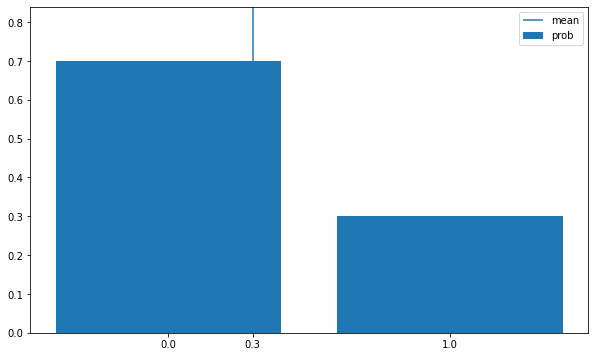

In [6]:
plot_prob(X)

In [7]:
# scipy.stats의 bernoulli 함수
rv = stats.bernoulli(p) # rv -> Random Variable

In [8]:
rv.pmf(0), rv.pmf(1)

(0.7000000000000001, 0.3)

In [9]:
# 인수로 리스트를 넘길 수 있음
rv.pmf([0,1])

array([0.7, 0.3])

In [10]:
# cdf -> 누적밀도함수
rv.cdf([0,1])

array([0.7, 1. ])

In [11]:
# 기댓값, 분산
rv.mean(), rv.var()

(0.3, 0.21)

#### 2. 이항분포 (Binomial Distribution)
* 이항분포 -> 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
* 확률변수가 취할 수 있는 값 -> {0,1,2,...,n} (성공하는 횟수가 0~n번까지이므로)
* 이항분포의 확률함수:\
$
f(x) = 
\begin{cases}
{n \choose x}p^x(1-p)^(n-x) \ (x\in{0,1,...,n})\\
0 \ (otherwise)
\end{cases}
$
* 예시: 동전을 10번 던져 앞면이 나올 확률 -> Bin(10,1/2), 주사위를 4번 굴려 6이 나올 확률 -> Bin(4, 1/6)
* 이항분포의 기댓값과 분산:\
$
X \sim Bin(n,p)라고 할 때\\
E(X) = np, V(X) = np(1-p)
$

In [12]:
# 이항분포 numpy 구현
from scipy.special import comb # 조합 계산

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [13]:
# Bin(10,0.3)을 따르는 확률변수 X
n = 10
p = 0.3
X = Bin(n,p)

In [14]:
check_prob(X)

expected value 3.0
variance 2.1


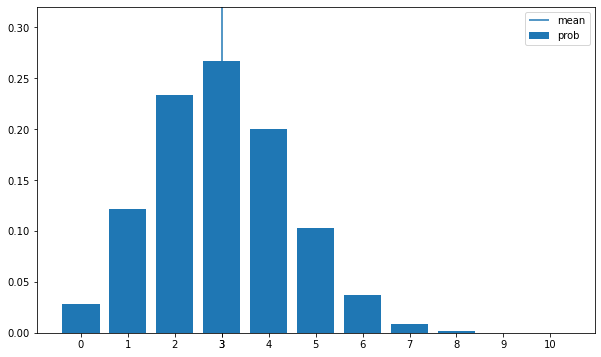

In [15]:
plot_prob(X)

<function matplotlib.pyplot.show(close=None, block=None)>

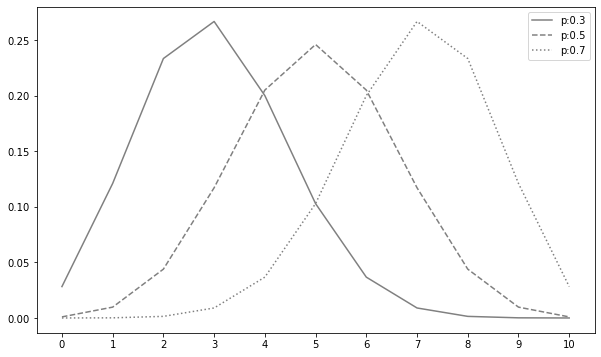

In [16]:
# scipy.stats의 binom활용
# n=10 고정일 때, p=0.3, p=0.5, p=0.7일 때의 이항분포 형태 확인
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()
    
plt.show

* p가 커질수록, 정상이 되는 값이 커짐
* p=0.5일 때 좌우대칭 형태로 분포, p=0.3,p=0.7이 대칭 관계

#### 3. 기하분포 (Geometric Distribution)
* 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
* 첫 번째 성공하는 경우가 있으면 연달아 실패할 수도 있음 -> 확률변수가 취할 수 있는 값은 1이상인 정수 전체
* 기하분포의 확률함수:\
$
f(x) = 
\begin{cases}
(1-p)^{(x-1)}p \ (x\in{1,2,3,...})\\
0 \ (otherwise)
\end{cases}
$
* 예시: 앞면이 나올 때까지 동전을 던지는 횟수, 6이 나올 때까지 주사위를 굴린 횟수
* 기하분포의 기댓값과 분산:\
$
X \sim Ge(p)라고 할 때\\
E(X) = {1 \over p}, V(X) = {(1-p) \over p^2}
$

In [17]:
# 기하분포 numpy 구현
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [18]:
# Ge(1/2)
p = 0.5
X = Ge(p)

In [19]:
check_prob(X)

expected value 2.0
variance 2.0


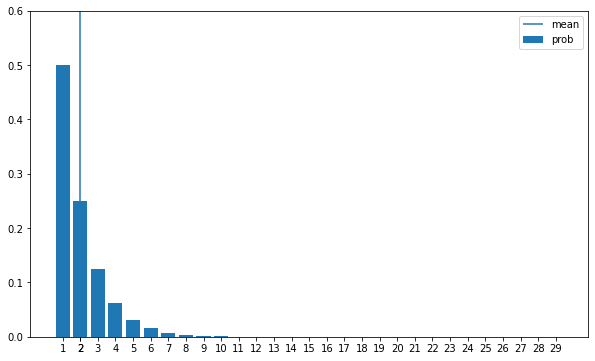

In [20]:
plot_prob(X)

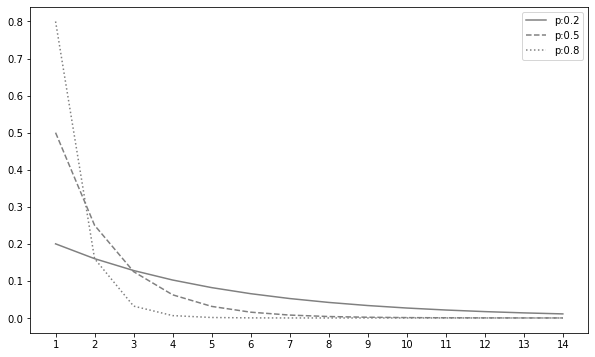

In [21]:
# scipy.stats의 geom 활용
# p=0.2, p=0.5, p=0.8일 때 기하분포
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p,ls in zip([0.2,0.5,0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

* 파라미터 p가 무엇이든지 간에, 값이 커질수록 확률이 지수적으로 감소하는 분포

#### 4. 포아송 분포
* 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
* 발생하는 건수의 확률분포 -> 확률변수가 취할 수 있는 값은 {0,1,2,...}
* 포아송 분포의 확률함수:\
$
f(x) = 
\begin{cases}
{\lambda^x \over x!} \cdot e^{-\lambda}  \ (x\in {0,1,2,...})\\
0 \ (otherwise)
\end{cases}
$
* 예시: 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수, 한 시간에 평균 10번 액세스하는 사이트에 대한 한 시간당 액세스 건수
* 기하분포의 기댓값과 분산:\
$
X \sim Poi(p)라고 할 때\\
E(X) = {\lambda}, V(X) = {\lambda}
$

In [22]:
# 포아송 분포 numpy 구현
# 구현의 편의상 x_set를 0이상 19이하 정수로 함
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [23]:
# Poi(3)
lam = 3
X = Poi(lam)

In [24]:
check_prob(X)

expected value 3.0
variance 3.0


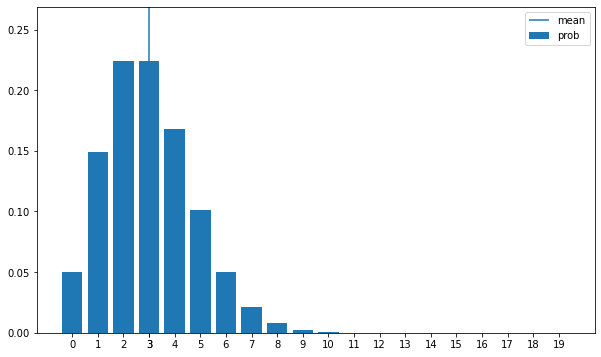

In [25]:
plot_prob(X)

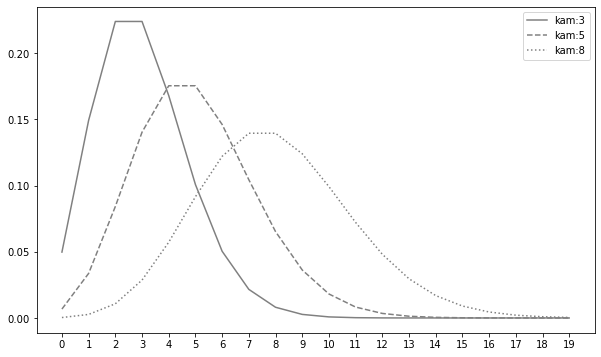

In [26]:
# scipy.stats의 poisson 활용
# 람다를 3,5,8로 변화시킬 때 포아송 분포 형태
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam,ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'kam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

* 어떠한 파라미터라도 분포의 정상에는 람다가 있고, 람다가 커질수록 경사면이 더욱 완만해짐